# Human Activity Recognition (Mini Project)
## Team: TensionFlow 

## Importing Libraries and Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from latex import latexify, format_axes
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from MakeDataset import *
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

Dataset Generated from ```MakeDataset.py```

In [3]:
X_train,X_test,y_train,y_test
X_test,X_val,y_test,y_val

(array([[[ 1.117381  , -0.2150651 , -0.1197104 ],
         [ 1.182103  , -0.1884563 , -0.3548489 ],
         [ 1.347448  , -0.1616058 , -0.7211422 ],
         ...,
         [ 1.090269  , -0.2721665 , -0.04102138],
         [ 1.203932  , -0.2861042 , -0.169497  ],
         [ 1.303106  , -0.2517698 , -0.3089289 ]],
 
        [[ 0.7223944 , -0.04254155,  0.1396254 ],
         [ 0.6465172 , -0.06599962,  0.1413182 ],
         [ 0.5390463 , -0.08611107,  0.08724535],
         ...,
         [ 0.8119605 , -0.164538  ,  0.07772932],
         [ 0.7347109 , -0.0903701 ,  0.1143167 ],
         [ 0.6903421 , -0.06816314,  0.128346  ]],
 
        [[-0.125035  ,  0.1796067 ,  0.9342056 ],
         [-0.1249287 ,  0.1938837 ,  0.9459361 ],
         [-0.126541  ,  0.2074263 ,  0.9490746 ],
         ...,
         [-0.1686777 ,  0.1970063 ,  0.9669448 ],
         [-0.1699484 ,  0.1981236 ,  0.9627429 ],
         [-0.1705578 ,  0.1989835 ,  0.9593829 ]],
 
        ...,
 
        [[ 1.086435  , -0.1609291 

In [4]:
X_train

array([[[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       [[ 1.00564   , -0.1732591 , -0.2299191 ],
        [ 1.006267  , -0.1727248 , -0.2516695 ],
        [ 1.004331  , -0.1783138 , -0.2447012 ],
        ...,
        [ 0.9963187 , -0.165975  , -0.2166365 ],
        [ 0.998345  , -0.1662256 , -0.2176124 ],
        [ 1.00105   , -0.1642913 , -0.2210956 ]],

       [[ 0.784794  , -0.2597323 , -0.2317497 ],
        [ 0.8028195 , -0.2151319 , -0.2276441 ],
        [ 0.7250539 , -0.2064177 , -0.2095281 ],
        ...,
        [ 0.6540971 , -0.140727  , -0.2860766 ],
        [ 0.6268603 , -0.2748843 , -0.2455943 ],
        [ 0.6052588 , -0.3292142 , -0.1952567 ]],

       ...,

       [[ 1.013856  , -0.08463204, -0.1833906 ],
        [ 1

Extract $a_x, a_y, a_z$ from ```X_train```

In [5]:
aXYZ_Xtrain = X_train[:, :, 0], X_train[:, :, 1], X_train[:, :, 2]

Get Total Acceleration $(a_x^2 + a_y^2 + a_z^2)$ Time Series from ```X_train```, ```X_test```, ```X_val```

In [6]:
X_train_TS = np.sum(np.square(X_train), axis = -1)
X_test_TS = np.sum(np.square(X_test), axis = -1)
X_val_TS = np.sum(np.square(X_val), axis = -1)

In [7]:
print(X_train_TS.shape, X_test_TS.shape, X_val_TS.shape)

(108, 500) (36, 500) (36, 500)


In [8]:
y_train

array([5, 5, 2, 3, 6, 4, 1, 5, 5, 4, 3, 1, 6, 5, 4, 1, 5, 1, 4, 6, 2, 4,
       6, 3, 6, 1, 1, 6, 6, 2, 5, 1, 4, 2, 6, 4, 3, 3, 6, 4, 2, 3, 6, 3,
       5, 5, 3, 1, 3, 1, 4, 6, 4, 5, 4, 4, 3, 4, 2, 4, 2, 1, 2, 5, 4, 2,
       5, 2, 3, 6, 1, 3, 2, 2, 1, 3, 6, 2, 5, 1, 3, 2, 4, 5, 4, 2, 1, 1,
       1, 3, 5, 5, 6, 1, 4, 6, 6, 5, 3, 3, 2, 6, 6, 3, 1, 5, 2, 2])

The Sort Order

In [9]:
df = pd.DataFrame(X_train_TS)
df["Label"] = y_train
df.sort_values(by = "Label", inplace = True)
S = np.array(df.index)
S

array([ 86,  26,  25,  87,  93,  47,  49,  17,  15,  31,  61,  88,  70,
        74,  79,   6,  11, 104,  33,  73,  72,  40,  62, 106,  58,  67,
        65,  81,  85,  60, 107,  77,   2, 100,  29,  20,  75,   3,  71,
       103,  68,  80,  10,  99,  98,  56,  48,  89,  41,  36,  37,  43,
        23,  46,  32,  35,   5,  39,   9,  64,  21,  54,  59,  57,  55,
        84,  18,  52,  82,  50,  94,  14,  97,  78,  91,  90, 105,  83,
         0,  53,  66,  63,   1,  45,  44,   7,  30,   8,  13,  16,   4,
       102, 101,  12,  96,  69,  19,  76,  92,  24,  27,  28,  34,  38,
        42,  51,  95,  22], dtype=int64)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Label
86,0.714053,0.732246,0.768960,0.853281,0.950569,1.001927,1.025067,1.039051,1.033828,1.021974,...,1.477209,1.245564,0.884933,0.751383,0.895341,1.111554,1.159284,1.061964,0.962311,1
26,0.751970,0.651734,0.579656,0.587043,0.606218,0.727218,0.797291,0.794672,0.834353,0.888909,...,0.396283,0.573048,0.702095,0.827120,0.867516,0.805562,0.813949,0.771488,0.791860,1
25,0.596975,0.577279,0.564058,0.773096,0.871679,1.057734,1.427447,1.728494,1.920396,1.673412,...,0.961942,1.053653,1.100745,1.275938,1.522039,1.531372,1.548665,1.541446,1.412323,1
87,1.447083,1.243813,0.999385,0.811583,0.683452,0.727751,0.759291,0.818850,0.947241,0.960450,...,1.395899,1.404201,1.532946,2.060462,2.916117,3.367976,2.650901,1.300202,0.516547,1
93,0.678714,0.700478,1.148305,2.166170,2.921367,2.662965,1.954290,1.440979,1.186594,1.258637,...,1.112212,1.326475,1.516445,1.761912,2.096122,1.985628,1.334452,0.939196,0.868019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.996194,0.991963,0.984747,0.987995,0.992127,0.994089,0.995440,0.998901,1.003637,1.002344,...,1.010409,1.008286,1.004564,1.001250,0.997999,0.996779,0.991216,0.983254,0.985567,6
42,1.030783,1.005243,0.994559,0.997765,1.005931,1.004629,0.970352,0.929467,0.959656,1.012440,...,0.978252,1.000408,1.027792,1.028454,1.006944,0.987428,0.983824,0.990666,0.990392,6
51,1.017841,1.016995,1.024412,1.029757,1.026955,1.028478,1.026419,1.026562,1.034466,1.037380,...,1.035634,1.040731,1.038952,1.027263,1.011913,1.013323,1.020733,1.019209,1.022797,6
95,1.003037,1.000143,1.002048,0.993890,0.997013,1.012518,1.025586,1.026735,1.021032,1.016388,...,1.010742,1.016365,1.022836,1.018828,1.014693,1.025160,1.033535,1.029625,1.023284,6


Sorting the $a_x, a_y, a_z$ also as according to the Label sort index

In [11]:
aXYZ_Xtrain = aXYZ_Xtrain[0][S], aXYZ_Xtrain[1][S], aXYZ_Xtrain[2][S]

Sort the total acceleration $(a_x^2 + a_y^2 + a_z^2)$ according to label sort index and get the FINAL TIME SERIES for all test data subjects $108$

In [12]:
df_Xtrain = pd.DataFrame(X_train_TS)
df_Xtrain["Label"] = y_train
df_Xtrain.sort_values(by = "Label", inplace = True)
df_Xtrain.set_index(pd.Series(range(108)), inplace = True)
df_Xtrain

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Label
0,0.714053,0.732246,0.768960,0.853281,0.950569,1.001927,1.025067,1.039051,1.033828,1.021974,...,1.477209,1.245564,0.884933,0.751383,0.895341,1.111554,1.159284,1.061964,0.962311,1
1,0.751970,0.651734,0.579656,0.587043,0.606218,0.727218,0.797291,0.794672,0.834353,0.888909,...,0.396283,0.573048,0.702095,0.827120,0.867516,0.805562,0.813949,0.771488,0.791860,1
2,0.596975,0.577279,0.564058,0.773096,0.871679,1.057734,1.427447,1.728494,1.920396,1.673412,...,0.961942,1.053653,1.100745,1.275938,1.522039,1.531372,1.548665,1.541446,1.412323,1
3,1.447083,1.243813,0.999385,0.811583,0.683452,0.727751,0.759291,0.818850,0.947241,0.960450,...,1.395899,1.404201,1.532946,2.060462,2.916117,3.367976,2.650901,1.300202,0.516547,1
4,0.678714,0.700478,1.148305,2.166170,2.921367,2.662965,1.954290,1.440979,1.186594,1.258637,...,1.112212,1.326475,1.516445,1.761912,2.096122,1.985628,1.334452,0.939196,0.868019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.996194,0.991963,0.984747,0.987995,0.992127,0.994089,0.995440,0.998901,1.003637,1.002344,...,1.010409,1.008286,1.004564,1.001250,0.997999,0.996779,0.991216,0.983254,0.985567,6
104,1.030783,1.005243,0.994559,0.997765,1.005931,1.004629,0.970352,0.929467,0.959656,1.012440,...,0.978252,1.000408,1.027792,1.028454,1.006944,0.987428,0.983824,0.990666,0.990392,6
105,1.017841,1.016995,1.024412,1.029757,1.026955,1.028478,1.026419,1.026562,1.034466,1.037380,...,1.035634,1.040731,1.038952,1.027263,1.011913,1.013323,1.020733,1.019209,1.022797,6
106,1.003037,1.000143,1.002048,0.993890,0.997013,1.012518,1.025586,1.026735,1.021032,1.016388,...,1.010742,1.016365,1.022836,1.018828,1.014693,1.025160,1.033535,1.029625,1.023284,6


In [13]:
df_Xtrain["Label"].value_counts()

Label
1    18
2    18
3    18
4    18
5    18
6    18
Name: count, dtype: int64

In [14]:
classes

{'WALKING': 1,
 'WALKING_UPSTAIRS': 2,
 'WALKING_DOWNSTAIRS': 3,
 'SITTING': 4,
 'STANDING': 5,
 'LAYING': 6}

In [15]:
classesN = {1 : 'WALKING', 2 : 'WALKING_UPSTAIRS', 3 : 'WALKING_DOWNSTAIRS', 4 : 'SITTING', 5 : 'STANDING', 6 : 'LAYING'}
classesN

{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING'}

## Questions/Tasks

### 1. Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? **[1 mark]**

Plot of each $(a_x, a_y, a_z)$ for all subjects<br>
$(a_x, a_y, a_z) = \set{\text{Red, Green, Blue}}$

In [97]:
fig, axes = plt.subplots(18, 6, figsize = (250, 275))
fig.suptitle(r"Time Series of Acceleration $(acc_x, acc_y, acc_z)$", size = 240)
sortedY_train = np.array(df_Xtrain["Label"])
colors = ["red", "green", "blue"]
c = 0
for i in range(6):
    for j in range(18):
        for k in range(3):
            time_series = aXYZ_Xtrain[k][c]
            axes[j, i].plot(time_series, color = colors[k], linewidth = 3)
            axes[j, i].set_title(f"Subject {c + 1}, Class = {classesN[sortedY_train[c]]}", fontsize = 90)
            axes[j, i].set_ylabel(r"Acceleration in $ms^{-2}$", fontsize = 60)
            axes[j, i].set_xlabel("Time Samples", fontsize = 60)
        c += 1


plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig("Activity_Individual.png")
plt.close()

**Answer**:<br>
1. From the above plots, one can easily differentiate between Static Activities (like Laying, Sitting, Standing) and Dynamic Activities (Walking, Walking Downstairs, Walking Upstairs) as the Dynamic Activities are more volatile and seem to have greater variance as compared to the Static Activities.

2. Among subjects belonging to the same class, there is a certain degree of similarity in the trends of time series data. 

3. The model may be capable of classifying the activites into Static and Dynamic, though further classification may depend on many factors like model hyperparameters, feature matrix, etc.

### 2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $(acc_x^2 + acc_y^2 + acc_z^2)$ for each activity and justify your answer. **[1 mark]**

In [98]:
latexify()
fig, axes = plt.subplots(18, 6, figsize = (250, 275))
fig.suptitle(r"Time Series of Total Acceleration $(acc_x^2 + acc_y^2 + acc_z^2)$", size = 240)
sortedY_train = np.array(df_Xtrain["Label"])
colors = ["red", "deeppink", "purple", "teal", "green", "blue"]
c = 0
for i in range(6):
    for j in range(18):
        time_series = df_Xtrain.iloc[c, : -1]
        axes[j, i].plot(time_series, color = colors[i], linewidth = 4)
        axes[j, i].set_title(f"Subject {c + 1}, Class = {classesN[sortedY_train[c]]}", fontsize = 90)
        axes[j, i].set_ylabel(r"Total Acceleration in  $m^{2}s^{-4}$", fontsize = 60)
        axes[j, i].set_xlabel("Time Samples", fontsize = 60)
        c += 1

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig("Activity_Tot.png")
plt.close()

**Answer**: 
1. For differentiating between Static and Dynamic Activities, implementation of a machine learning model may not be necessary but it may be a sufficient condition. \

2. One can always extract time series features from the samples of activities and draw meaningful inferences out of it. 

3. A more automated way of the same would be to implement a machine learning model that learns the distribution of data.

4. A simple machine learning model like a Decision Tree Classifier might work well in classifying between Static and Dynamic activites as the Dynamic Activities are more volatile and seem to have greater variance as compared to the Static Activities.

### 3. Train Decision Tree using trainset and report Accuracy and confusion matrix using testset. **[1 mark]**

Raw Time Series for $108$ Training Subjects and $500$ features/samples

In [16]:
model = DecisionTreeClassifier(random_state=42)
clfg = model.fit(X_train_TS, y_train)
y_pred = clfg.predict(X_test_TS)
y_pred

array([6, 1, 6, 1, 6, 5, 6, 1, 1, 1, 4, 6, 6, 5, 2, 6, 5, 5, 3, 6, 4, 1,
       4, 5, 2, 1, 3, 6, 1, 4, 6, 6, 6, 1, 1, 3])

Classification Report

$\text{Accuracy} = \frac{||y = \hat{y}||}{||y||}$<br>

$\text{Precision} = \frac{||y = \hat{y} = \text{Class}||}{||\hat{y} = \text{Class}||} = \frac{\text{T.P.}}{\text{T.P.} + \text{F.P.}}$<br>

$\text{Recall} = \frac{||y = \hat{y} = \text{Class}||}{||y = \text{Class}||} = \frac{\text{T.P.}}{\text{T.P.} + \text{F.N.}}$<br>

$\text{F-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$<br>

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.40      0.67      0.50         6
           2       0.50      0.17      0.25         6
           3       0.33      0.17      0.22         6
           4       0.50      0.33      0.40         6
           5       1.00      0.83      0.91         6
           6       0.50      1.00      0.67         6

    accuracy                           0.53        36
   macro avg       0.54      0.53      0.49        36
weighted avg       0.54      0.53      0.49        36



Confusion Matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [classT for classT in classes], columns = [classT for classT in classes])

Confusion Matrix Plot Handler

In [19]:
## flag = 1 for a single plot and 0 for subplots for 2 - 8 depths
def confMatrix(dataFrame, flag = 1, accuracies = None):
    if flag:
        plt.figure(figsize = (15, 15))
        ax = sns.heatmap(dataFrame, annot = True, cmap = "PuBu")
        plt.setp(ax.get_xticklabels(), rotation = 45, fontsize = 8)
        plt.setp(ax.get_yticklabels(), fontsize = 8)
        plt.ylabel("True label", fontsize = 18)
        plt.xlabel("Predicted label", fontsize = 18)
        plt.title(f"Accuracy = {accuracy_score(y_test, y_pred)*100: .4f}%", fontweight = "bold", fontsize = 13)
        plt.savefig("Single_ConfusionM.png")
        plt.show()
    else:
        fig, axes = plt.subplots(3, 3, figsize = (25, 25))
        axes = axes.flatten()

        for i, df in enumerate(dataFrame):
            ax = sns.heatmap(df, annot = True, ax = axes[i], cbar = False, cmap = "PuBu")
            
            plt.setp(ax.get_xticklabels(), rotation = 45, fontsize = 6)
            plt.setp(ax.get_yticklabels(), fontsize = 8)
            ax.set_title(f"Depth = {i + 2}\nAccuracy = {accuracies[i] * 100: .4f}%", fontsize = 10)
            ax.set_ylabel("True label", fontsize = 12)
            ax.set_xlabel("Predicted label", fontsize = 12)
            
        plt.delaxes(axes[7])
        plt.delaxes(axes[8])
        plt.tight_layout()
        plt.subplots_adjust(wspace = 1.1, hspace = 1.1)
        plt.savefig("DepthConfusionM.png")
        plt.show()

Confusion Matrix Image

In [ ]:
confMatrix(df_cm, 1)

**Answer**:<br>
1. The overall performance of the Decision Tree Classifier model trained on the raw total acceleration $(acc_x^2 + acc_y^2 + acc_z^2)$ dataset was on average barely better than a fair coin toss.

2. The model performed decently well in classifying between Static and Dynamic Activities. 

3. Classification among the Static Activities: 
    - The model performed the best in classifying the activity STANDING, while it mispredicted LAYING as SITTING. 
    - On the contrary, classifications among the Dynamic Activities showed confusion.

4. _NOTE: The above observations are specific to a single random model and cannot be generalized for any model. Additionally, the number of samples available for training and testing are quite few hence, nothing much can be said about the distributions of activities._   

### 4. Train Decision Tree with varying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Does the accuracy change when the depth is increased? Plot the accuracies and reason why such a result has been obtained. **[1 mark]**

Varying Tree Depths $(2 - 8)$ and looking at the results for each depth

In [20]:
confusion_matrices, class_reports, class_reports_dict, accuracies = [], [], [], []
for i in range(2, 9):
    model = DecisionTreeClassifier(max_depth = i,random_state=42)
    clfg = model.fit(X_train_TS, y_train)
    y_pred = clfg.predict(X_test_TS)
    
    pred, actual = y_pred, y_test
    
    cm = confusion_matrix(actual, pred)
    
    confusion_matrices.append(pd.DataFrame(cm, index = [classT for classT in classes], columns = [classT for classT in classes]))
    class_reports.append(classification_report(actual, pred, labels = np.unique(pred)))
    class_reports_dict.append(classification_report(actual, pred, labels = np.unique(pred), output_dict = True))
    accuracies.append(accuracy_score(actual, pred))

Confusion Matrix Image (for varying tree depths)

In [ ]:
confMatrix(confusion_matrices, 0, accuracies = accuracies)

Classification reports

In [21]:
for i in range(2,9):
    print(f'Depth = {i}\n{class_reports[i-2]}\n\n')

Depth = 2
              precision    recall  f1-score   support

           1       0.38      0.50      0.43         6
           3       0.50      0.17      0.25         6
           5       0.75      1.00      0.86         6
           6       0.33      1.00      0.50         6

   micro avg       0.44      0.67      0.53        24
   macro avg       0.49      0.67      0.51        24
weighted avg       0.49      0.67      0.51        24



Depth = 3
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       1.00      0.17      0.29         6
           3       0.50      0.33      0.40         6
           4       0.29      0.33      0.31         6
           5       0.86      1.00      0.92         6
           6       0.55      1.00      0.71         6

    accuracy                           0.56        36
   macro avg       0.61      0.56      0.52        36
weighted avg       0.61      0.56      0.52        36



**Answer**:
1. From the classification reports, one can infer that the accuracy of classifying activities is in general increasing.

2. At $\text{Depth} = 2$, the model seems to underfit the data which is evident from its large number of misclassifications of Dynamic Activities as Static ones and classification of only a few number of activities (model did not make a single prediction for acivities WALKING UPSTAIRS and SITTING).  

3. The accuracy peaks at $\text{Depth} = 5$ and  $\text{Depth} = 6$ equivalent to an expected peak in accuracy at higher depths. 

4. _NOTE: The above observations are specific to a selected random model and cannot be generalized for any model. Additionally, the number of samples available for training and testing are quite few hence, nothing much can be said about the distributions of activities._   

### 5. Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2 + acc_y^2 + acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. Are you able to see any difference? **[2 marks]**

PCA

In [22]:
X_train_TS

array([[1.06157854, 1.06878783, 1.07663955, ..., 1.07006725, 1.07156541,
        1.06563868],
       [1.09419332, 1.10574467, 1.10035525, ..., 1.06713003, 1.07167885,
        1.077976  ],
       [0.73707041, 0.74262272, 0.61221345, ..., 0.52948693, 0.52883177,
        0.51284538],
       ...,
       [1.06869868, 1.0749136 , 1.07277162, ..., 1.05377336, 1.05334102,
        1.05920066],
       [2.4370817 , 2.28797019, 1.47224448, ..., 0.74864055, 0.62982035,
        0.55244367],
       [0.5263928 , 0.61295331, 0.62514398, ..., 0.56394259, 0.61358203,
        0.6272256 ]])

In [23]:
y_train

array([5, 5, 2, 3, 6, 4, 1, 5, 5, 4, 3, 1, 6, 5, 4, 1, 5, 1, 4, 6, 2, 4,
       6, 3, 6, 1, 1, 6, 6, 2, 5, 1, 4, 2, 6, 4, 3, 3, 6, 4, 2, 3, 6, 3,
       5, 5, 3, 1, 3, 1, 4, 6, 4, 5, 4, 4, 3, 4, 2, 4, 2, 1, 2, 5, 4, 2,
       5, 2, 3, 6, 1, 3, 2, 2, 1, 3, 6, 2, 5, 1, 3, 2, 4, 5, 4, 2, 1, 1,
       1, 3, 5, 5, 6, 1, 4, 6, 6, 5, 3, 3, 2, 6, 6, 3, 1, 5, 2, 2])

In [24]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train_TS)
PCA_model = PCA(n_components = 2)
Xtrain_2d = PCA_model.fit_transform(Xtrain_scaled)
Xtrain_2d

array([[  0.62514001,  -0.46802427],
       [  0.63234514,  -0.46988931],
       [ 10.00564281,   2.29222641],
       [ -8.89251163,  -1.17367187],
       [  0.66876547,  -0.51228789],
       [  0.56868534,  -0.66118522],
       [  3.72862926,  -3.36540967],
       [  0.61540173,  -0.47510482],
       [  0.58973752,  -0.80275472],
       [  0.5906055 ,  -0.60189724],
       [ 25.30818848,  23.08867127],
       [ -4.52924186, -11.70100525],
       [  0.5533023 ,  -0.68161771],
       [  0.64202428,  -0.49612471],
       [  0.60230298,  -0.54711998],
       [  0.82758266,   2.8133838 ],
       [  0.63927565,  -0.45887961],
       [ -2.07905624,   6.11350778],
       [  0.60354738,  -0.53531272],
       [  0.55986103,  -0.64700393],
       [ 10.20676336, -12.2495047 ],
       [  0.5992636 ,  -0.5489634 ],
       [  0.6343633 ,  -0.62005572],
       [ 13.63046866, -12.04520693],
       [  0.57106804,  -0.56656021],
       [  1.08448722,   0.26809375],
       [ -5.05155445,  -6.10886467],
 

In [25]:
dfPCA = pd.DataFrame({"Feature1": Xtrain_2d[:, 0], "Feature2" : Xtrain_2d[:, 1], "Labels" : y_train})
dfPCA

,Feature1,Feature2,Labels
0,0.625140,-0.468024,5
1,0.632345,-0.469889,5
2,10.005643,2.292226,2
3,-8.892512,-1.173672,3
4,0.668765,-0.512288,6
...,...,...,...
103,-20.141242,-15.782273,3
104,-2.666550,-7.477495,1
105,0.603315,-0.512754,5
106,9.783043,-6.199490,2


Covariance across the reduced features is nill $\implies$ Orthogonal Dimensions

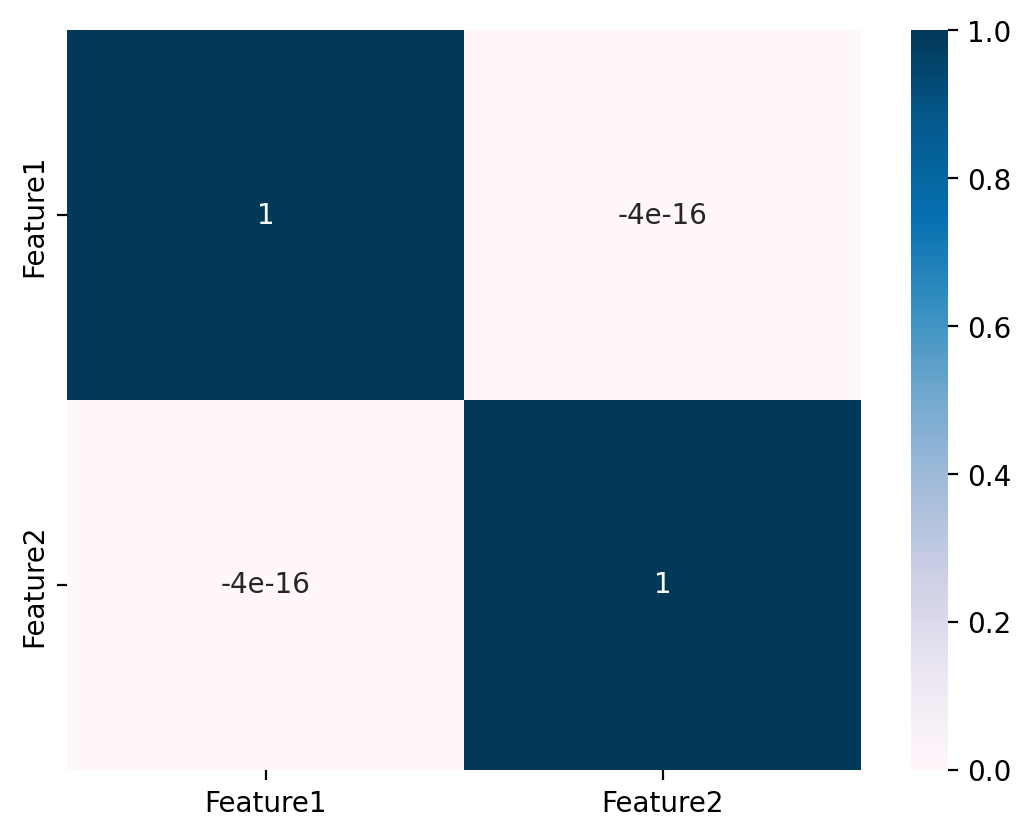

In [26]:
sns.heatmap(dfPCA.iloc[:, :-1].corr(), annot = True, cmap = "PuBu")
plt.show()

Function to plot the reduced dimensionality points

In [ ]:
def PCA_Plot(dataFrame):
    latexify(fig_width = 6, columns = 2)
    for label, color in zip((classes), ("b", "g", "r", "cyan", "magenta", "yellow")):
        plt.scatter(dataFrame[dataFrame["Labels"] == classes[label]].iloc[:, 0], dataFrame[dataFrame["Labels"] == classes[label]].iloc[:, 1], c = color, s = 10, label = label)
    plt.title("108 Subject Samples in 2D for 6 activity classes")
    plt.grid()
    plt.legend(fontsize = 7)
    format_axes(plt.gca())
    plt.show()

PCA_Plot(dfPCA)

Reference Code for what is done for the above scatter plot

In [28]:
dfPCA[dfPCA["Labels"] == classes["WALKING_DOWNSTAIRS"]]

,Feature1,Feature2,Labels
3,-8.892512,-1.173672,3
10,25.308188,23.088671,3
23,13.630469,-12.045207,3
36,-3.268443,2.323488,3
37,11.416644,-1.332108,3
41,-11.236858,11.725971,3
43,-8.148362,7.536090,3
46,-9.739841,-9.888996,3
48,-20.153044,-22.289992,3
56,14.153279,-0.261943,3


In [29]:
print(list(zip((classes), ("b", "g", "r", "purple", "crimson", "gold"))))

[('WALKING', 'b'), ('WALKING_UPSTAIRS', 'g'), ('WALKING_DOWNSTAIRS', 'r'), ('SITTING', 'purple'), ('STANDING', 'crimson'), ('LAYING', 'gold')]


#### TSFEL

In [30]:
df = pd.DataFrame(X_train_TS)
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.061579,1.068788,1.076640,1.081619,1.083677,1.089191,1.088519,1.077718,1.072226,1.073787,...,1.065313,1.069200,1.072072,1.072758,1.069753,1.067005,1.067372,1.070067,1.071565,1.065639
1,1.094193,1.105745,1.100355,1.088352,1.073085,1.064589,1.070972,1.072502,1.076323,1.085273,...,1.071004,1.072441,1.074535,1.066675,1.063528,1.065388,1.066096,1.067130,1.071679,1.077976
2,0.737070,0.742623,0.612213,0.611427,0.618866,0.576885,0.663982,0.715187,0.761910,0.818487,...,0.715990,0.735479,0.709034,0.721843,0.720080,0.607252,0.565186,0.529487,0.528832,0.512845
3,2.330978,2.364194,2.285008,1.995089,1.486505,0.885626,0.609474,0.559679,0.520461,0.465431,...,0.496868,0.526072,0.593439,0.797267,1.059548,1.047754,1.088295,1.385482,1.619239,1.388138
4,1.045221,1.049030,1.053342,1.063177,1.059419,1.052925,1.058818,1.050844,1.043341,1.047368,...,1.053456,1.042352,1.038869,1.047991,1.053762,1.052498,1.050367,1.048974,1.050502,1.046420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.500916,0.606063,0.564021,0.562212,0.463815,0.469947,0.583276,0.670271,0.795946,0.760122,...,0.480198,0.635296,0.753394,0.837983,1.269750,2.453684,3.150181,2.569922,2.442537,2.661125
104,1.667010,1.683330,1.400401,1.398746,1.443760,1.429334,1.422312,1.272041,1.266330,1.635466,...,0.556597,0.625043,0.718228,0.822178,0.822011,0.734799,0.777650,0.816605,0.869754,1.036154
105,1.068699,1.074914,1.072772,1.067998,1.060452,1.060050,1.068315,1.065193,1.064904,1.071375,...,1.071639,1.072648,1.073712,1.070341,1.070436,1.070280,1.060376,1.053773,1.053341,1.059201
106,2.437082,2.287970,1.472244,0.668358,0.561077,0.932713,1.170589,1.235397,1.133492,0.844032,...,1.284310,1.342955,1.152644,1.066167,0.971577,0.797153,0.791073,0.748641,0.629820,0.552444


In [ ]:
cfg = tsfel.get_features_by_domain()
dataFrames = []
for i in df.index:
    dataFrames.append(tsfel.time_series_features_extractor(cfg, df.iloc[i, :-1], fs = 50))
dfN = pd.concat(dataFrames, axis = 0)

RAW $384$ features extracted by TSFEL

In [32]:
dfN["Labels"] = y_train
dfN

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,Labels
0,569.075705,10.636220,569.075705,57.136115,4.979561,99.0,399.0,1.062801,1.072469,0.002004,...,0.006259,0.013934,0.024435,0.037655,0.053506,0.071860,0.092549,0.115449,0.0,5
0,579.622830,10.732310,579.622830,58.195063,4.971302,99.0,399.0,1.068014,1.085206,0.002004,...,0.007552,0.015177,0.025654,0.038921,0.054519,0.072446,0.092785,0.115520,0.0,5
0,841.473605,11.564206,841.473605,84.485302,5.077121,99.0,399.0,0.706582,1.506981,0.002004,...,0.350996,0.670973,1.215355,2.045464,3.019338,3.843646,4.253551,4.172395,0.0,2
0,890.893549,11.513712,890.893549,89.447143,4.727663,99.0,399.0,0.589435,1.672927,0.002004,...,0.475594,1.124732,2.055514,3.186720,4.239761,4.812305,4.736978,4.154588,0.0,3
0,546.028965,10.418397,546.028965,54.822185,4.980675,99.0,399.0,1.039717,1.052347,0.002004,...,0.006215,0.013479,0.023464,0.036109,0.051239,0.068644,0.088218,0.109939,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1174.891609,12.309517,1174.891609,117.961005,5.001240,99.0,399.0,0.533640,2.134063,0.002004,...,0.823848,2.252737,4.344499,6.774873,8.948374,9.969489,9.415121,7.672377,0.0,3
0,758.887771,11.426105,758.887771,76.193551,4.898316,99.0,399.0,0.692239,1.584723,0.002004,...,0.254539,0.469054,0.971069,1.656798,2.220043,2.415790,2.201866,1.728551,0.0,1
0,566.912035,10.615638,566.912035,56.918879,4.984870,99.0,399.0,1.057648,1.074541,0.002004,...,0.006474,0.013838,0.024087,0.037105,0.052600,0.070655,0.091338,0.114562,0.0,5
0,831.123472,11.555750,831.123472,83.446132,5.084222,99.0,399.0,0.737660,1.550728,0.002004,...,0.391183,0.810084,1.422302,2.144942,2.856797,3.342426,3.424903,3.113001,0.0,2


In [33]:
for i in dfN.columns[:-1]:
    print(i)

0_Absolute energy
0_Area under the curve
0_Autocorrelation
0_Average power
0_Centroid
0_ECDF Percentile Count_0
0_ECDF Percentile Count_1
0_ECDF Percentile_0
0_ECDF Percentile_1
0_ECDF_0
0_ECDF_1
0_ECDF_2
0_ECDF_3
0_ECDF_4
0_ECDF_5
0_ECDF_6
0_ECDF_7
0_ECDF_8
0_ECDF_9
0_Entropy
0_FFT mean coefficient_0
0_FFT mean coefficient_1
0_FFT mean coefficient_10
0_FFT mean coefficient_100
0_FFT mean coefficient_101
0_FFT mean coefficient_102
0_FFT mean coefficient_103
0_FFT mean coefficient_104
0_FFT mean coefficient_105
0_FFT mean coefficient_106
0_FFT mean coefficient_107
0_FFT mean coefficient_108
0_FFT mean coefficient_109
0_FFT mean coefficient_11
0_FFT mean coefficient_110
0_FFT mean coefficient_111
0_FFT mean coefficient_112
0_FFT mean coefficient_113
0_FFT mean coefficient_114
0_FFT mean coefficient_115
0_FFT mean coefficient_116
0_FFT mean coefficient_117
0_FFT mean coefficient_118
0_FFT mean coefficient_119
0_FFT mean coefficient_12
0_FFT mean coefficient_120
0_FFT mean coefficient_121


Direct PCA on these $384$ dimensional data to reduce to $2$ dimensions

In [34]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(dfN.iloc[:, : - 1])
PCA_model = PCA(n_components = 2)
Xtrain_2d = PCA_model.fit_transform(Xtrain_scaled)
Xtrain_2d

array([[-10.57053445,   1.43032868],
       [ -9.83100955,   0.98823221],
       [  7.14249536,  -1.28224075],
       [ 27.97356707,  42.79667504],
       [-10.44932734,   1.34766181],
       [-10.39274182,   1.3612905 ],
       [ -1.22148147,  -2.87487609],
       [-10.55015546,   1.4299397 ],
       [-10.02980712,   1.05390743],
       [-10.73290869,   1.5277897 ],
       [ 29.35046016,  23.16158828],
       [  7.67742761,  -3.88294991],
       [-10.84631703,   1.52592089],
       [-10.73242663,   1.55404887],
       [-10.60255609,   1.43556983],
       [  3.95017321,  -2.80351869],
       [-10.10729628,   1.08006346],
       [  1.35955365,  -3.72099151],
       [-10.87107409,   1.65392423],
       [-11.11681992,   1.71615719],
       [  4.95844069,  -3.09879259],
       [-10.79816107,   1.5881032 ],
       [-10.70774784,   1.54259708],
       [ 17.09967453,  -1.6105275 ],
       [-10.7676359 ,   1.56179688],
       [  7.9647529 ,  -2.86083841],
       [  2.78331509,  -3.16099772],
 

In [35]:
dfPCA = pd.DataFrame({"Feature1": Xtrain_2d[:, 0], "Feature2" : Xtrain_2d[:, 1], "Labels" : y_train})
dfPCA

,Feature1,Feature2,Labels
0,-10.570534,1.430329,5
1,-9.831010,0.988232,5
2,7.142495,-1.282241,2
3,27.973567,42.796675,3
4,-10.449327,1.347662,6
...,...,...,...
103,17.162289,-2.219703,3
104,1.926706,-3.515855,1
105,-10.227137,1.170730,5
106,5.125623,-4.101281,2


Looks like better segregration of points in their clusters

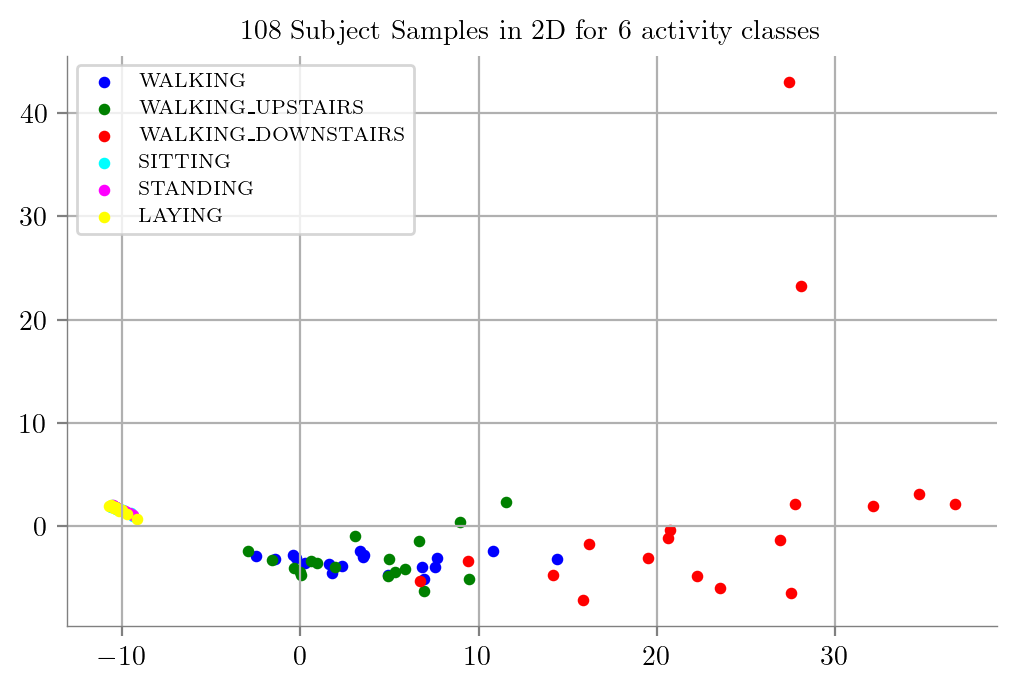

In [96]:
PCA_Plot(dfPCA)